<a href="https://colab.research.google.com/github/joao-albc/Bootcamp-Alura-Data-Science-Aplicada-2-Producao-Hospitalar/blob/main/Projeto_Mod_01_Alura_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

## Projeto Bootcamp ALURA Módulo 1:

Explicar o que é a Alura e o Bootcamp

##Escopo proposto

**Módulo 01: Python e pandas para análise de dados reais**

*Neste módulo vamos aprender como utilizar **Python**, **Pandas** e **Matplotlib** para explorar os dados financeiros do SUS, mais precisamente os gastos por Unidade Federativa ao longo dos anos. Os desafios se iniciam na aquisição dos dados em uma plataforma do governo e seus possíveis problemas, passando pelo leitura destes dados com o Pandas até a criação de hipóteses na área da saúde, que sempre devem ser cuidadosas, simulando os desafios diários de uma pessoa cientista de dados.*

Alura (*https://bootcamps.alura.com.br/bootcamp-data-science-aplicada-2*)

## Objetivo:

Na primeira parte do curso, foram abordadas ( pontuar as aula). O objetivo deste projeto é colocar em prática o que foi aprendido no modulo 1.

## Dados:

Foi dada a opção de usar os dados de produção hospitalar, fosse número de internação, óbito, dias de permanência, taxa de mortalidade ou outros. Os dados ficam disponíveis no **portal da saúde do SUS** *(http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi)*

Fiz a escolha de selecionar os dados por número de óbitos. Estes, podem ser baixados no formato **.CSV**

#Exploração dos dados

#Importação de bibliotecas

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:.2f}".format

##Preparação dos dados

In [2]:
obitos = pd.read_csv('https://raw.githubusercontent.com/joao-albc/Bootcamp-Alura-Data-Science-Aplicada-2-Producao-Hospitalar/main/Projetos/Projeto_01/Dados/A221901189_28_143_208.csv', encoding="ISO-8859-1", sep=";", skiprows = 3, skipfooter=12)
# O skiprows é usado para pular o cabeçalho

obitos.set_index('Unidade da Federação', inplace = True)
obitos.drop('Total', axis = 1, inplace = True)
obitos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,194,...,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,438,413,606,571
12 Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,-,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,145,...,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,335
13 Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,357,...,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1618,1891,1157
14 Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,48,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,47,...,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,287,203
15 Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,801,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,727,...,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1071,1172,1285,1445,611
16 Amapá,65,81,42,51,34,42,52,52,59,83,58,84,68,68,48,91,64,77,69,75,82,71,66,76,90,80,68,80,43,84,78,50,73,54,76,70,81,79,52,75,...,54,83,80,96,105,96,84,86,77,89,91,82,116,72,110,116,108,90,85,87,75,96,96,76,97,70,59,84,187,179,216,149,80,76,63,146,110,136,205,180
17 Tocantins,141,210,253,199,173,216,229,202,189,164,195,196,165,247,168,171,206,202,218,218,210,242,200,161,229,223,256,205,211,202,233,222,187,241,226,209,216,233,206,241,...,218,173,228,168,167,155,195,213,170,178,168,130,246,264,249,220,208,211,210,220,278,224,220,217,283,252,290,231,248,283,363,333,341,299,285,233,257,314,52,41
21 Maranhão,202,320,308,335,374,307,363,409,354,319,216,330,297,362,350,359,407,358,332,438,434,364,373,445,407,398,486,443,444,457,483,437,422,429,472,381,465,447,574,515,...,947,861,874,979,980,950,885,880,798,777,813,857,1022,836,1025,903,994,1007,911,962,873,917,837,827,940,909,970,900,1826,1933,1491,1138,1051,1110,1063,859,1066,1150,1856,1901
22 Piauí,224,337,337,277,368,358,368,294,358,363,355,276,332,334,312,407,350,484,337,370,266,341,323,380,419,386,390,414,379,347,291,300,304,295,379,350,358,343,432,371,...,530,507,553,562,578,518,584,463,495,495,513,464,509,522,510,617,598,587,574,567,564,531,496,537,558,503,469,434,477,566,839,918,654,713,559,578,675,738,697,897


In [3]:
investimento = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/joao-albc/Bootcamp-Alura-Data-Science-Aplicada-2-Producao-Hospitalar/main/Projetos/Projeto_01/Dados/A171352189_28_143_208.csv',skiprows = 3,skipfooter= 12, encoding="ISO-8859-1",thousands=".", decimal=",",sep=";"))
investimento.set_index('Unidade da Federação', inplace = True)
investimento.drop('Total', axis = 1, inplace = True)
investimento

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,263528

Substituição de valores em relação ao **12 Acre** no em **2009/Set**

A ideia é que os values sejam substituídos pelo valor média



Óbitos

In [4]:
#variável para receber somente os valores do Estado (index)
n = obitos.loc['12 Acre'].values
#insere o valor com a média da array sem contar o valor ausente
obitos[obitos.columns[20]][1] = np.mean(np.delete(n,20))
# obitos[obitos.columns[20]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Investimento

In [5]:
#variável para receber somente os valores do Estado (index)
n = investimento.loc['12 Acre'].values
#insere o valor com a média da array sem contar o valor ausente
investimento[investimento.columns[20]][1] = np.mean(np.delete(n,20))
# investimento[investimento.columns[20]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


##Inserir mês e ano

In [6]:
def insert_month_year(df):
  meses = []
  for i in df.T.index:
    meses.append(re.search('\w*[a-zA-Z]',str(i)).group())

  ano = []
  for i in df.T.index:
    ano.append(int(re.search('\d*',str(i)).group()))

  df = df.T

  df['Mes'] = meses

  df['Ano'] = ano

  return df

In [7]:

"""obitos = insert_month_year(obitos)
obitos"""


'obitos = insert_month_year(obitos)\nobitos'

In [8]:

"""investimento = insert_month_year(investimento)
investimento"""


'investimento = insert_month_year(investimento)\ninvestimento'

##Inserir Região

In [9]:
def insert_regiao(df):

  estados = df.index[:]
  regiao = []
  c = 0

  for i in estados:
    num = estados[c][0:2]
    if int(num) >= 11 and int(num) <= 17:
      regiao.append('Norte')
    elif int(num) >= 21 and int(num) <= 29:
      regiao.append('Nordeste')
    elif int(num) >= 31 and int(num) <= 35:
      regiao.append('Sudeste')
    elif int(num) >= 41 and int(num) <= 43:
      regiao.append('Sul')
    elif int(num) >= 50 and int(num) <= 53:
      regiao.append('Centro-Oeste')
    c+=1

  df['Região'] = regiao

  return df

In [10]:
investimento = insert_regiao(investimento)
obitos = insert_regiao(obitos)

##**Análises por região**

**Explorar dados por região**

Podemos observar que existe um equilíbrio entre a média de investimento total e o número de óbitos por cada região do país. Na relação entre óbitos e investimentos, a região com maior sobra foi a Sul, com + 2.2% investidos. Por outro lado, o Sudeste registrou uma diferença de -4%.

In [11]:
tabela_regiao = pd.DataFrame(obitos.groupby(['Região']).sum().T.sum().sort_values(), columns=['Óbitos.'])
tabela_regiao['% obt.'] = (obitos.groupby(['Região']).sum().T.sum().sort_values() / obitos[obitos.columns[0:-1]].sum().sum().round(4)*100)
tabela_regiao['Investimento'] = investimento.groupby(['Região']).sum().T.sum().sort_values()
tabela_regiao['% inv.'] = (investimento.groupby(['Região']).sum().T.sum().sort_values() / investimento.groupby(['Região']).sum().sum().sum())*100
tabela_regiao['% dif.'] = tabela_regiao['% inv.'] - tabela_regiao['% obt.']
tabela_regiao

,Óbitos.,% obt.,Investimento,% inv.,% dif.
Região,,,,,
Norte,322451,5.21,9676199583.83,5.64,0.43
Centro-Oeste,390728,6.31,12008118248.88,7.00,0.68
Sul,1128892,18.24,35111267832.97,20.46,2.22
Nordeste,1388688,22.44,39638740396.07,23.10,0.66
Sudeste,2958682,47.80,75173969609.62,43.81,-4.00


In [12]:
# obitos.groupby(['Região']).sum().T.sum().sort_values()


**Gráficos**

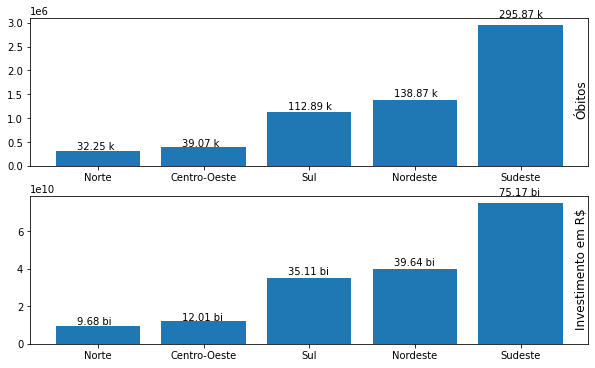

In [13]:
fig, (ax,ax2) = plt.subplots(2, figsize=(10,6))
ax.set_title('Óbitos', loc='right', y=-0.1, pad=65.0, rotation = 90.0)
ax.bar(obitos.groupby(['Região']).sum().T.sum().sort_values().keys(),\
       obitos.groupby(['Região']).sum().T.sum().sort_values())

col = (obitos.groupby(['Região']).sum().T.sum().sort_values().keys())
val = (obitos.groupby(['Região']).sum().T.sum().sort_values().values)

#É usado ZIP para fazer a tupla com os dados de coluna e seu valor de maneira agregada
result = zip(col, val)
result = (tuple(result))
result

c = 0
for i in result:
  #Para inserir o rótulo de dados de cada uma das barras
  ax.annotate(str((val[c]/10000).round(2))+' k',xy=(c-0.2, val[c]*1.05))
  c+=1

ax2.set_title('Investimento em R$', loc='right', y=-0.1, pad=32.0, rotation = 90.0)
ax2.bar(investimento.groupby(['Região']).sum().T.sum().sort_values().keys(),\
       investimento.groupby(['Região']).sum().T.sum().sort_values())

col = (investimento.groupby(['Região']).sum().T.sum().sort_values().keys())
val = (investimento.groupby(['Região']).sum().T.sum().sort_values().values)

result = zip(col, val)
result = (tuple(result))
result

c = 0
for i in result:
  #Para inserir o rótulo de dados de cada uma das barras
  ax2.annotate(str((val[c]/1000000000).round(2))+' bi',xy=(c-0.2, val[c]*1.05))
  c+=1

plt.show()

Anos

**Comparação por estado**

Podemos observar nos gráficos a seguir, que o último ano apresentou um crescimento expressivo no volume de óbitos, o que nem sempre acompanhou um aumento do investimento. Cada linha é uma região do páis.

**Nordeste:**

> Maranhão e e Sergipe apresentaram uma concentração elevada de óbitos. Estes comportamentos não foram seguidos por nenhum dos estados da mesma região. 

**Norte:**

> Na parte final de cada um dos gráfico, há um aumento no número de óbitos. O que chama a atenção é a queda acentuada no volume de investimento e óbitos que ocorre nos últimos messes de Tocantins

**Sul, Sudeste e Centro-Oeste:**

> Estas últimas atr~es regiões exibiram um volume equilibrado entre as duas variáveis apresentadas para cada um de seus estados. Destaque para a curva de Investimento do Paraná, que passou a ser mais 

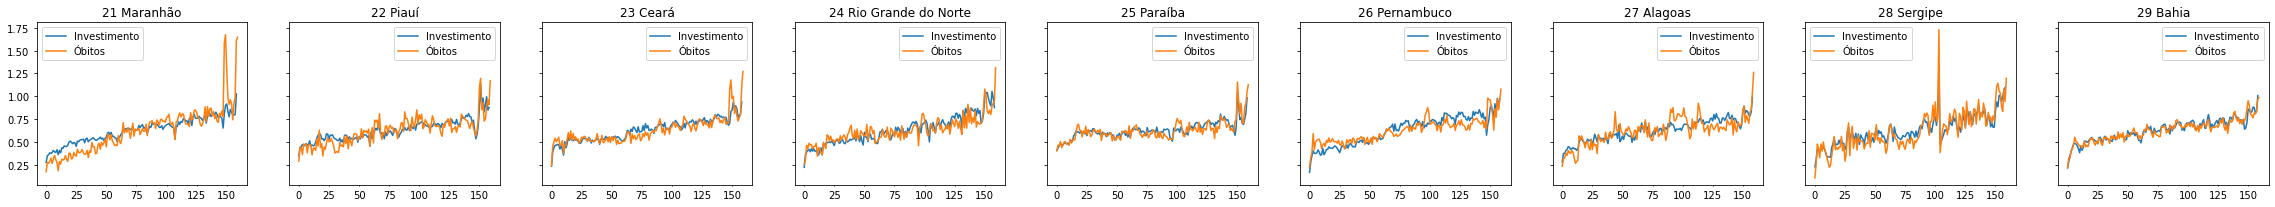

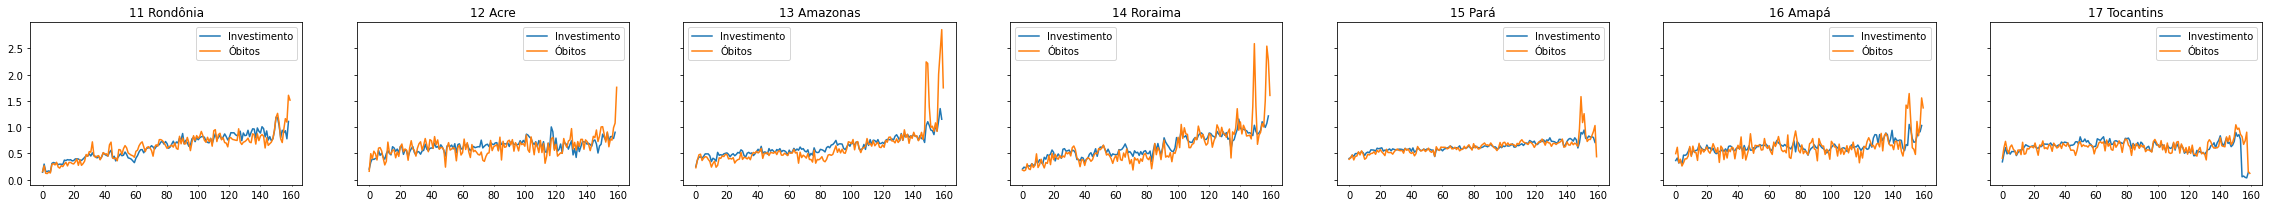

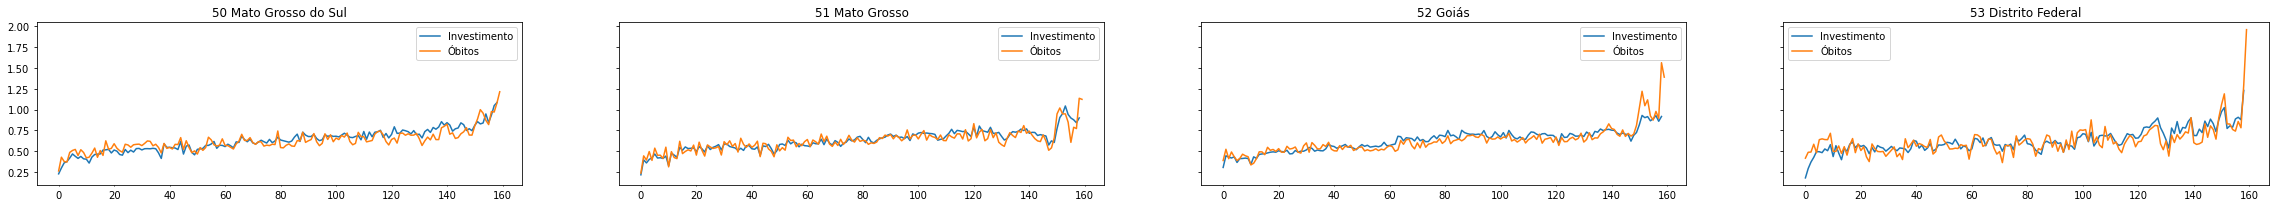

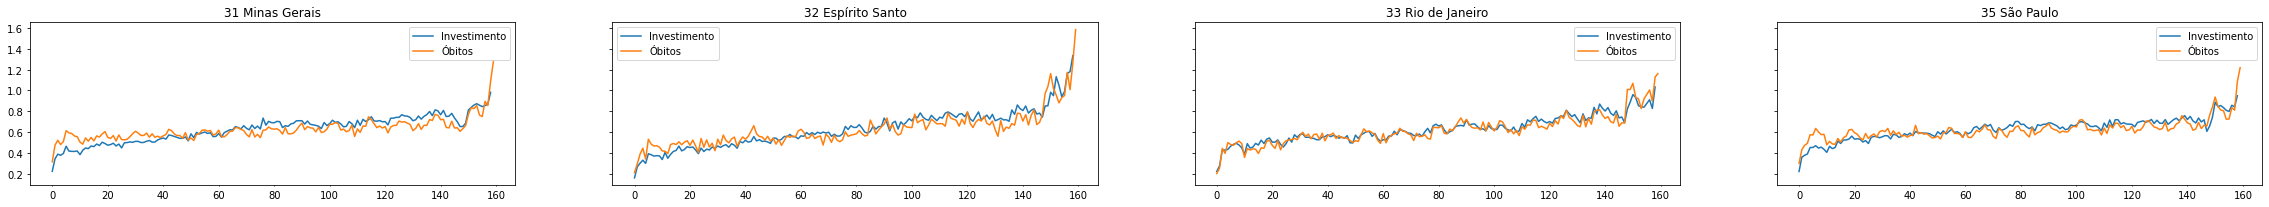

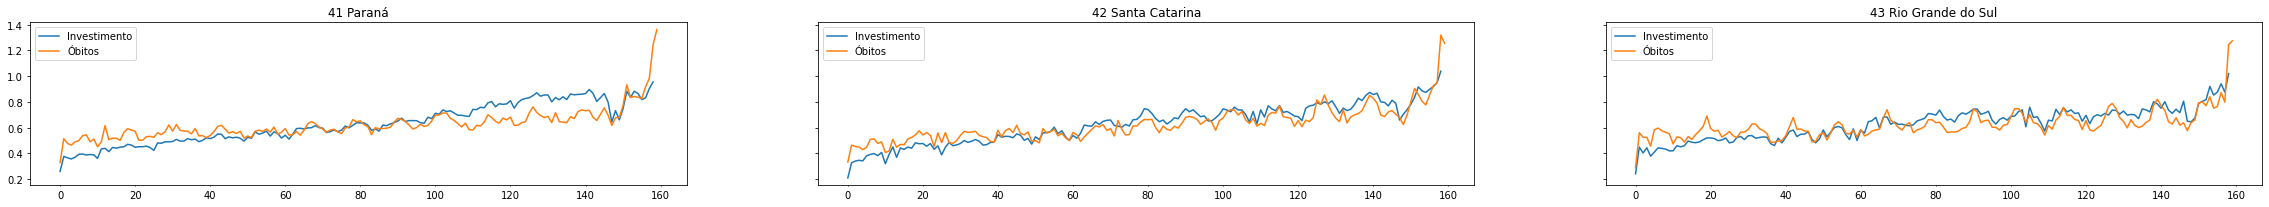

In [51]:
x = zip(tuple(investimento['Região'].value_counts().keys()), tuple(investimento['Região'].value_counts().values))
x = list(x)

y = 0
c = 0

for regiao in x:
  estados_regiao = list(investimento.index.where(investimento['Região'] == str(x[y][0])).dropna())
  fig, ax = plt.subplots(1,int(len(estados_regiao)), figsize=(40,3), sharey=True)
  for estado in estados_regiao:
    obts = obitos.T[:-1][estado].values
    inv = investimento.T[:-1][estado].values
    ax[c].plot(np.array(inv, dtype='float') / np.sum(inv, dtype='float') *100, label='Investimento')
    ax[c].plot(np.array(obts, dtype='float') / np.sum(obts, dtype='float') *100, label='Óbitos')
    ax.    

    ax[c].set_title(estado)
    ax[c].legend()
    c+=1
  c = 0
  y+=1

**Estados em foco**

Maranhão:

No mês de maio de 2020, a quantidade de Óbitos praticamente dobrou, passando de 900 (abril) para 1826 e 1933 nos meses  seguintes. O mesmo aconteceu depois de fevereiro de 2021. Desta vez, valor passou de 1.150 (fevereiro) para 1.856 e 1.901. 

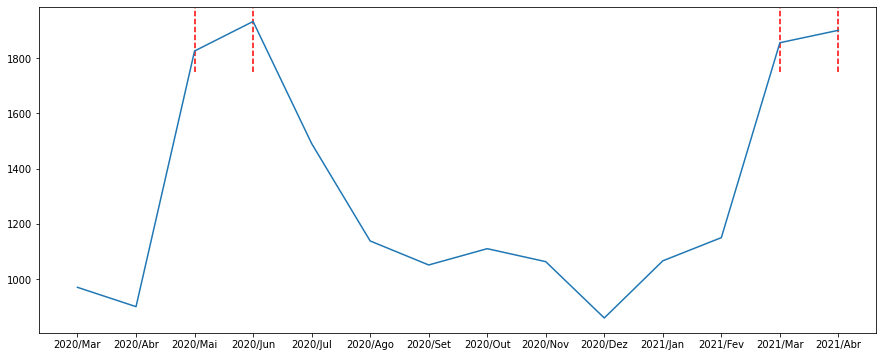

In [27]:
fig, ax = plt.subplots(figsize=(15,6))
n = obitos.T['21 Maranhão'][-15:-1]
# O pontos do eixo X a serem destacados, Valor máximo da linha, Valor mínimo da linha
ax.axes.vlines([2,3,12,13], 1750, n.max()+50, linestyles='--', color = 'r')
ax.plot(n)
plt.show()

Tocantins

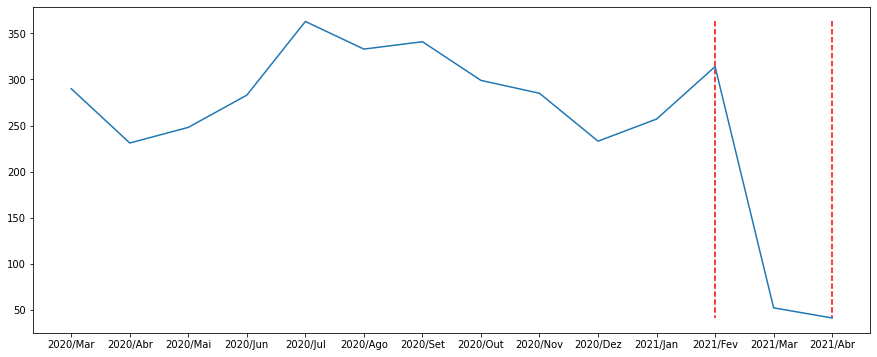

In [78]:
fig, ax = plt.subplots(figsize=(15,6))
n = obitos.T['17 Tocantins'][-15:-1]
# O pontos do eixo X a serem destacados, Valor máximo da linha, Valor mínimo da linha
ax.axes.vlines([len(n)-3,len(n)-1], n.max(), n.min(), linestyles='--', color = 'r')
ax.plot(n)
plt.show()